✅ Successfully loaded 123657 restaurants from your_zomato_data.csv

🏙️ RESTAURANT DISTRIBUTION BY CITY
Total restaurants analyzed: 123,657
Number of cities: 17
City
Hyderabad       15613
Jaipur          14438
Mumbai          13535
Chennai         13100
Bangalore       12040
Ahmedabad       10178
Kolkata          8662
Pune             8067
Kochi            7759
Raipur           7700
Lucknow          6455
New Delhi        3490
Goa              2360
Banaswadi          97
Ulsoor             66
Magrath Road       54
Malleshwaram       43
Name: count, dtype: int64


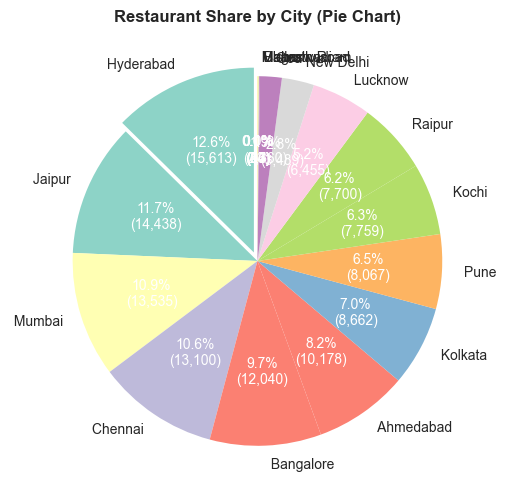

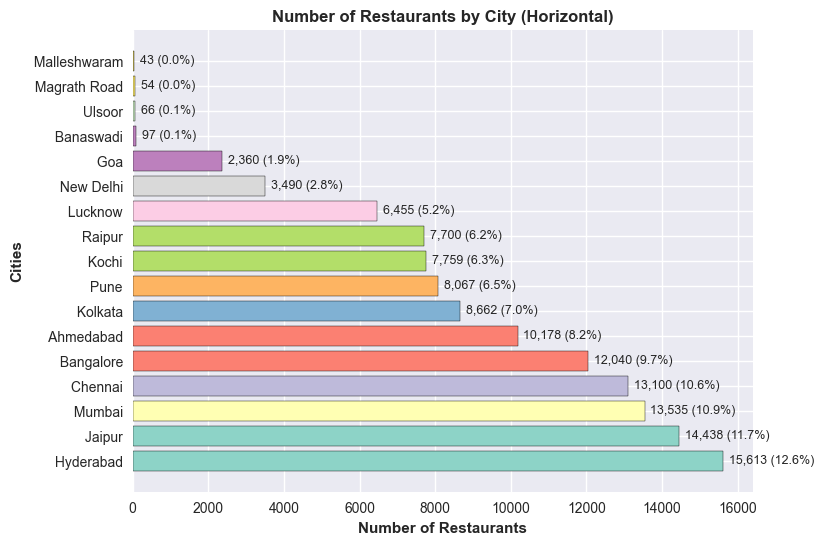

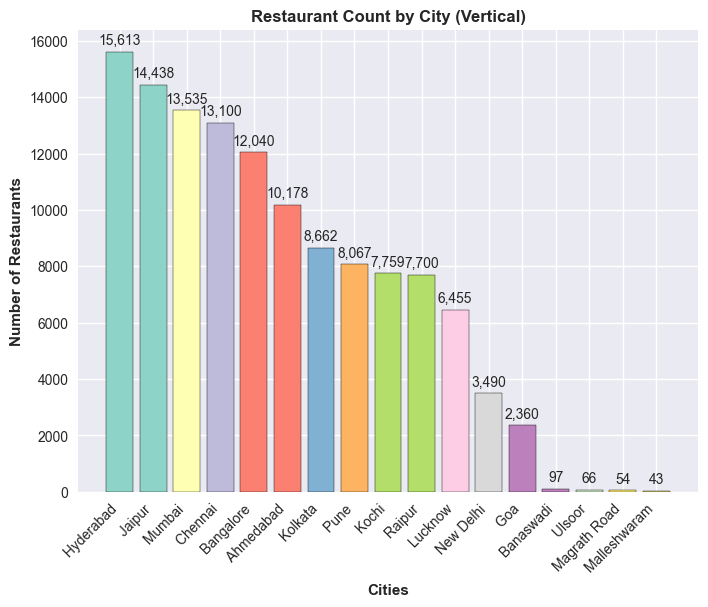

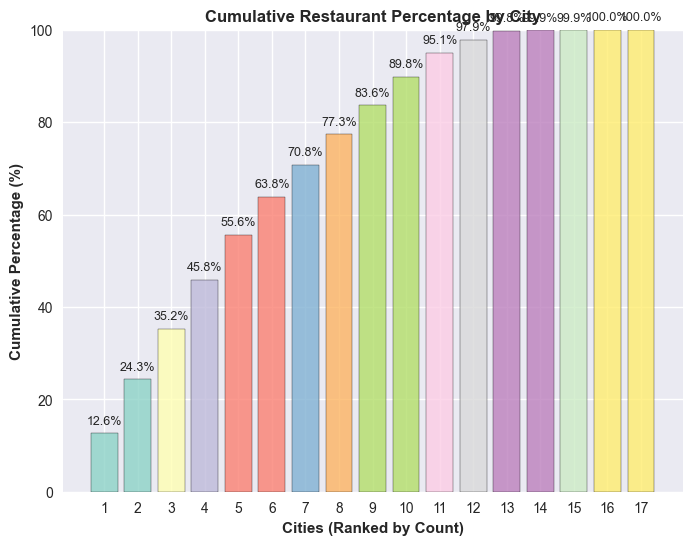

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')

def load_and_clean_data(csv_file_path):
    try:
        df = pd.read_csv(csv_file_path)
        print(f"✅ Successfully loaded {len(df)} restaurants from {csv_file_path}")
        
        if 'City' in df.columns:
            df['City'].fillna('Unknown', inplace=True)
        
        return df
    except FileNotFoundError:
        print(f"❌ File '{csv_file_path}' not found.")
        return None
    except Exception as e:
        print(f"❌ Error loading CSV: {str(e)}")
        return None

def create_city_distribution_charts_separate(csv_file_path):
    df = load_and_clean_data(csv_file_path)
    if df is None or 'City' not in df.columns:
        print("❌ Required column 'City' not found")
        return
    
    city_counts = df['City'].value_counts()
    total_restaurants = len(df)
    colors = plt.cm.Set3(np.linspace(0, 1, len(city_counts)))
    
    print("\n🏙️ RESTAURANT DISTRIBUTION BY CITY")
    print("=" * 45)
    print(f"Total restaurants analyzed: {total_restaurants:,}")
    print(f"Number of cities: {len(city_counts)}")
    print(city_counts)

    # Chart 1: Pie Chart
    plt.figure(figsize=(8, 6))
    wedges, texts, autotexts = plt.pie(city_counts.values, labels=city_counts.index, 
                                       autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*total_restaurants):,})',
                                       colors=colors, startangle=90, 
                                       explode=[0.05 if i == 0 else 0 for i in range(len(city_counts))])
    plt.title('Restaurant Share by City (Pie Chart)', fontweight='bold')
    for autotext in autotexts:
        autotext.set_color('white')
    plt.show()

    # Chart 2: Horizontal Bar Chart
    plt.figure(figsize=(8, 6))
    bars2 = plt.barh(range(len(city_counts)), city_counts.values, color=colors, edgecolor='black')
    plt.yticks(range(len(city_counts)), city_counts.index)
    plt.xlabel('Number of Restaurants', fontweight='bold')
    plt.ylabel('Cities', fontweight='bold')
    plt.title('Number of Restaurants by City (Horizontal)', fontweight='bold')
    for i, (bar, value) in enumerate(zip(bars2, city_counts.values)):
        percentage = (value / total_restaurants) * 100
        plt.text(bar.get_width() + max(city_counts.values)*0.01, 
                 bar.get_y() + bar.get_height()/2, 
                 f'{value:,} ({percentage:.1f}%)', va='center', fontsize=9)
    plt.show()

    # Chart 3: Vertical Bar Chart
    plt.figure(figsize=(8, 6))
    bars3 = plt.bar(range(len(city_counts)), city_counts.values, color=colors, edgecolor='black')
    plt.xticks(range(len(city_counts)), city_counts.index, rotation=45, ha='right')
    plt.xlabel('Cities', fontweight='bold')
    plt.ylabel('Number of Restaurants', fontweight='bold')
    plt.title('Restaurant Count by City (Vertical)', fontweight='bold')
    for bar, value in zip(bars3, city_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(city_counts.values)*0.01, 
                 f'{value:,}', ha='center', va='bottom', fontsize=10)
    plt.show()

    # Chart 4: Cumulative Percentage Chart
    cumulative_counts = city_counts.cumsum()
    cumulative_percentages = (cumulative_counts / total_restaurants) * 100
    plt.figure(figsize=(8, 6))
    bars4 = plt.bar(range(len(city_counts)), cumulative_percentages.values, 
                    color=colors, edgecolor='black', alpha=0.8)
    plt.xticks(range(len(city_counts)), [f'{i+1}' for i in range(len(city_counts))])
    plt.xlabel('Cities (Ranked by Count)', fontweight='bold')
    plt.ylabel('Cumulative Percentage (%)', fontweight='bold')
    plt.title('Cumulative Restaurant Percentage by City', fontweight='bold')
    plt.ylim(0, 100)
    for i, (bar, value) in enumerate(zip(bars4, cumulative_percentages.values)):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                 f'{value:.1f}%', ha='center', fontsize=9)
    plt.show()

# Run
CSV_FILE_PATH = "your_zomato_data.csv"  # Update this
create_city_distribution_charts_separate(CSV_FILE_PATH)
